In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import hvplot.pandas

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import f1_score

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

In [2]:
data = pd.read_csv(r"C:\Users\Parthiban\Downloads\train_loan_data (1).csv")
data

addr_state  annual_inc earliest_cr_line emp_length  \
0             CO     85000.0           Jul-97  10+ years   
1             CA     40000.0           Apr-87  10+ years   
2             FL     60000.0           Aug-07  10+ years   
3             IL    100742.0           Sep-80  10+ years   
4             MD     80000.0           Jul-99  10+ years   
...          ...         ...              ...        ...   
79995         SC     81000.0           Feb-00  10+ years   
79996         NH     45000.0           Aug-95  10+ years   
79997         NY     90000.0           Apr-05   < 1 year   
79998         TX     94000.0           Apr-92    3 years   
79999         NY   1100000.0           Jun-99    2 years   

                            emp_title  fico_range_high  fico_range_low grade  \
0                              Deputy              744             740     E   
1      Department of Veterans Affairs              724             720     B   
2                    Marble polishing              679             675     B   
3                             printer              664             660     B   
4                       Southern Mgmt              669             665     F   
...                               ...              ...             ...   ...   
79995            Sports Group Manager              664             660     G   
79996                    Web Designer              684             680     C   
79997                 Program Officer              724             720     B   
79998            Sr. Business Analyst              669             665     D   
79999               Managing Director              664             660     B   

      home_ownership application_type  ... pub_rec_bankruptcies  \
0           MORTGAGE       Individual  ...                  0.0   
1               RENT       Individual  ...                  0.0   
2           MORTGAGE       Individual  ...                  0.0   
3           MORTGAGE       Individual  ...                  0.0   
4               RENT       Individual  ...                  0.0   
...              ...              ...  ...                  ...   
79995       MORTGAGE       Individual  ...                  0.0   
79996       MORTGAGE       Individual  ...                  0.0   
79997            OWN       Individual  ...                  0.0   
79998       MORTGAGE       Individual  ...                  1.0   
79999       MORTGAGE       Individual  ...                  0.0   

                  purpose  revol_bal  revol_util  sub_grade        term  \
0      debt_consolidation       5338        93.6         E1   60 months   
1      debt_consolidation      19944        60.3         B1   36 months   
2      debt_consolidation      23199        88.5         B5   36 months   
3      debt_consolidation      18425        69.0         B2   36 months   
4      debt_consolidation      34370        90.0         F5   60 months   
...                   ...        ...         ...        ...         ...   
79995  debt_consolidation      20201        93.5         G3   60 months   
79996  debt_consolidation       6145        56.9         C1   36 months   
79997  debt_consolidation       3910        25.6         B4   36 months   
79998         credit_card      11897        49.4         D5   60 months   
79999  debt_consolidation     586259        96.7         B4   36 months   

                         title  total_acc  verification_status loan_status  
0           Debt consolidation          8      Source Verified   Defaulted  
1                  Credit Loan         12             Verified        Paid  
2           Debt consolidation         16      Source Verified        Paid  
3           Debt consolidation         19      Source Verified        Paid  
4          Debt Connsolidation         59             Verified        Paid  
...                        ...        ...                  ...         ...  
79995       Debt consolidation         42             Verified   Defaulted  
79

# Exploratory Data Analysis

# OVERALL GOAL:

Get an understanding of which variables are important, view summary statistics, and visualize the data

In [3]:
data.describe()

annual_inc  fico_range_high  fico_range_low      int_rate  \
count  8.000000e+04     80000.000000    80000.000000  80000.000000   
mean   7.604614e+04       699.987975      695.987813     13.232898   
std    6.902006e+04        31.734840       31.734075      4.771705   
min    0.000000e+00       664.000000      660.000000      5.310000   
25%    4.600000e+04       674.000000      670.000000      9.750000   
50%    6.500000e+04       694.000000      690.000000     12.740000   
75%    9.000000e+04       714.000000      710.000000     15.990000   
max    7.141778e+06       850.000000      845.000000     30.990000   

          loan_amnt  num_actv_bc_tl      mort_acc   tot_cur_bal      open_acc  \
count  80000.000000    76052.000000  77229.000000  7.605200e+04  80000.000000   
mean   14403.867813        3.633790      1.674759  1.415864e+05     11.605675   
std     8703.826298        2.262505      2.005104  1.593714e+05      5.483362   
min      750.000000        0.000000      0.000000  0.000000e+00      1.000000   
25%     7925.000000        2.000000      0.000000  2.964200e+04      8.000000   
50%    12000.000000        3.000000      1.000000  8.100050e+04     11.000000   
75%    20000.000000        5.000000      3.000000  2.110272e+05     14.000000   
max    40000.000000       32.000000     32.000000  5.172185e+06     80.000000   

            pub_rec  pub_rec_bankruptcies     revol_bal    revol_util  \
count  80000.000000          79969.000000  8.000000e+04  79947.000000   
mean       0.216675              0.137103  1.628934e+04     51.899142   
std        0.579854              0.383202  2.264915e+04     24.504836   
min        0.000000              0.000000  0.000000e+00      0.000000   
25%        0.000000              0.000000  5.965750e+03     33.500000   
50%        0.000000              0.000000  1.111100e+04     52.200000   
75%        0.000000              0.000000  1.963500e+04     70.800000   
max       24.000000              7.000000  1.023940e+06    152.600000   

          total_acc  
count  80000.000000  
mean      25.036875  
std       12.009194  
min        2.000000  
25%       16.000000  
50%       23.000000  
75%       32.000000  
max      162.000000

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [5]:
data.isnull().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
cat_cols = data.select_dtypes(include='object').columns
data[cat_cols] = data[cat_cols].astype('category')
data.select_dtypes(include='category').columns

Index(['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status', 'loan_status'],
      dtype='object')

In [8]:
for i in data.select_dtypes(include=['category']).columns:
    print('Unique values in', i, 'are :')
    print(data[i].value_counts(dropna=False))
    print('*'*50)

Unique values in addr_state are :
CA    11744
TX     6493
NY     6461
FL     5618
IL     3098
NJ     2853
PA     2676
OH     2575
GA     2530
NC     2291
VA     2249
MI     2091
AZ     1993
MA     1862
MD     1802
CO     1790
WA     1736
MN     1414
IN     1329
MO     1298
NV     1224
TN     1207
CT     1143
WI     1043
OR     1025
SC     1007
AL      986
LA      928
KY      836
OK      725
KS      649
AR      590
UT      554
NM      440
HI      404
MS      373
NH      373
RI      356
WV      268
NE      240
MT      229
DE      219
AK      215
DC      201
SD      192
WY      187
VT      181
ME      110
ID      106
ND       85
IA        1
Name: addr_state, dtype: int64
**************************************************
Unique values in earliest_cr_line are :
Sep-03    547
Aug-03    545
Aug-01    544
Oct-01    541
Sep-02    539
         ... 
Jul-65      1
Sep-59      1
Sep-65      1
Jul-64      1
Nov-66      1
Name: earliest_cr_line, Length: 640, dtype: int64
****************************

loan_status 

Current status of the loan

In [9]:
data['loan_status'].value_counts().hvplot.bar(
    title="Loan Status Counts", xlabel='Loan Status', ylabel='Count', width=500, height=350
)

:Bars   [index]   (loan_status)

In [10]:
def histogram_boxplot(feature, figsize=(15, 7), bins=None):
    """ 
    Boxplot and histogram combined
    feature: 2-d feature array
    figsize: size of fig (default (15,7))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='yellow') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=True, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=True, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='blue', linestyle='-');# Add median to the histogram

In [11]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=data, palette='mako')
    
    total = len(feature) # length of the column
    for p in ax.patches:
        # percentage of each class of the category
        percentage = 100 * p.get_height()/total
        percentage_label = f"{percentage:.1f}%"
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage_label, (x, y), size = 12) # annotate the percantage
        
    plt.show() # show the plot

In [12]:
### Function to plot distributions and Boxplots of customers
def target_plot(x, target='default'):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    fig,axs = plt.subplots(2, 2, figsize=(12,10))
    axs[0, 0].set_title('Distribution of an default')
    sns.distplot(data[(data[target] == 1)][x], ax=axs[0,0], color='teal')
    axs[0, 1].set_title('Distribution of an non-default')
    sns.distplot(data[(data[target] == 0)][x], ax=axs[0,1], color='orange')
    
    axs[1,0].set_title('Boxplot w.r.t default')
    sns.boxplot(data[target],data[x], ax=axs[1,0],palette='gist_rainbow')
    axs[1,1].set_title('Boxplot w.r.t non-default - Without outliers')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow')
    plt.tight_layout()
    plt.show()

In [13]:
data.select_dtypes(include='integer').columns

Index(['fico_range_high', 'fico_range_low', 'loan_amnt', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc'],
      dtype='object')

fico_range_high

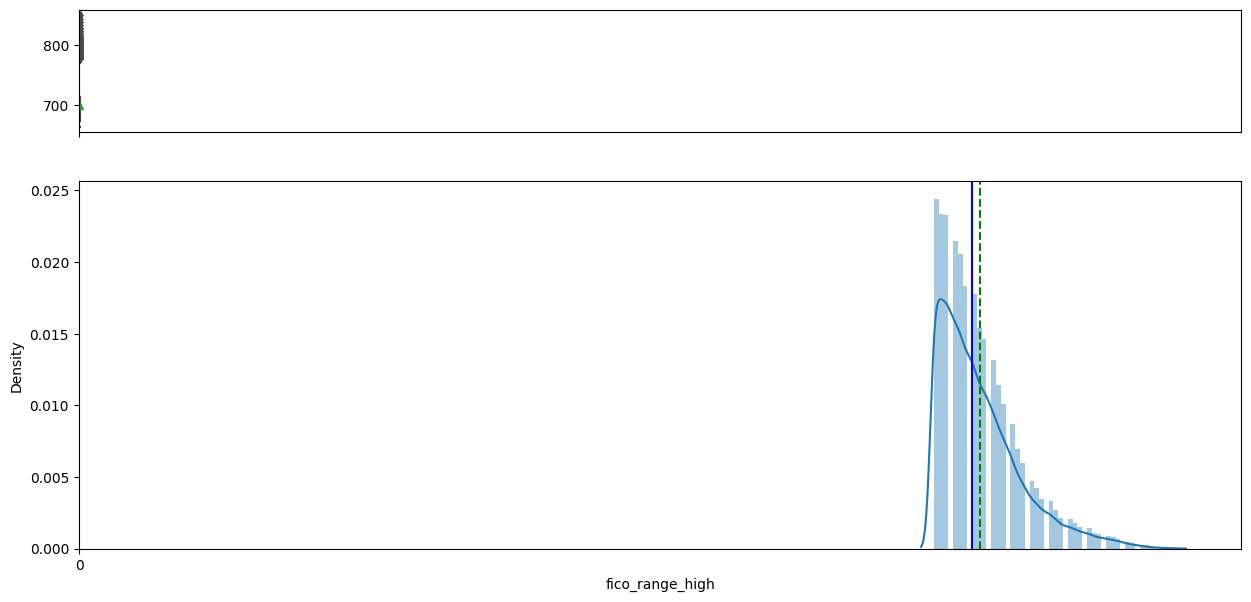

In [14]:
histogram_boxplot(data.fico_range_high)

fico_range_low

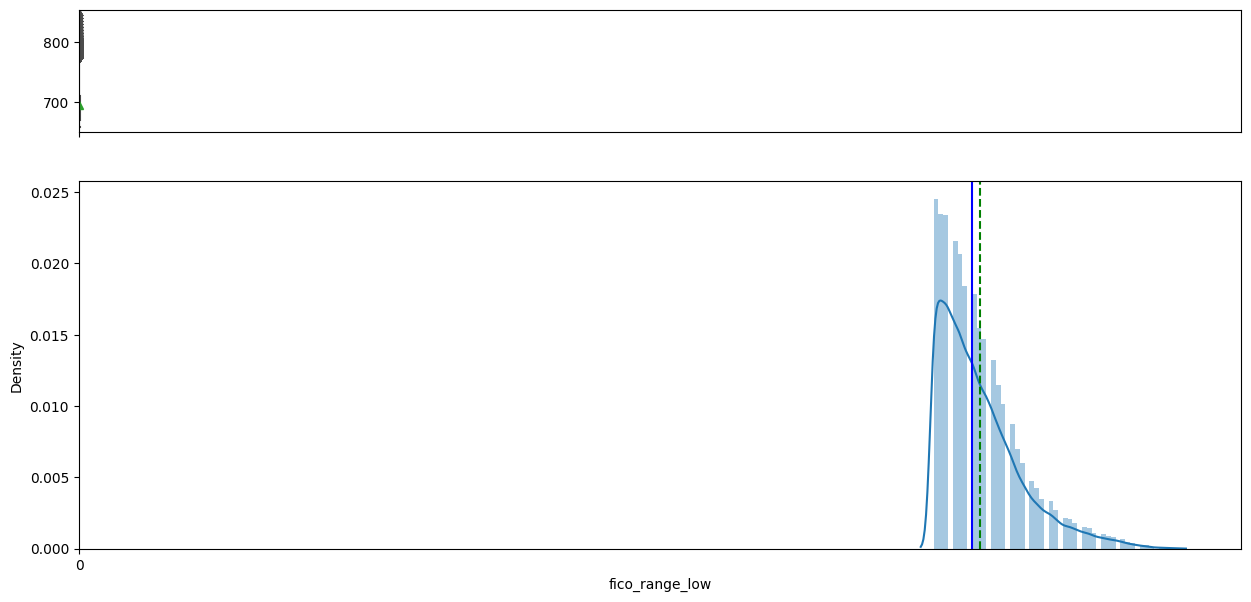

In [15]:
histogram_boxplot(data.fico_range_low)

loan_amnt 

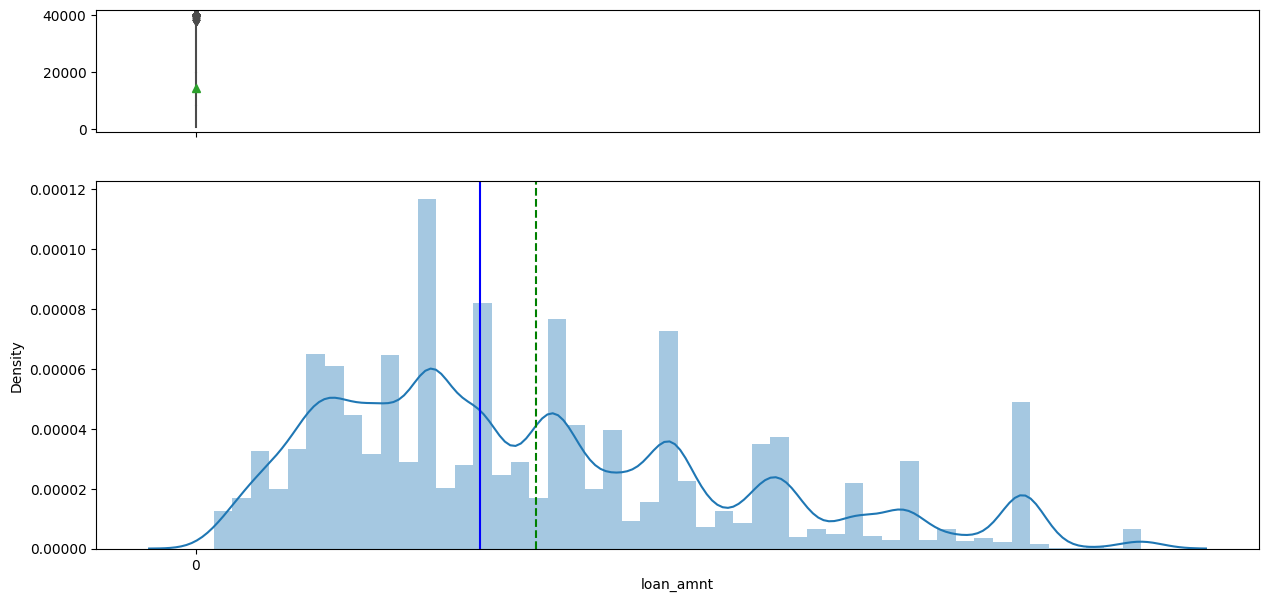

In [16]:
histogram_boxplot(data.loan_amnt)

open_acc

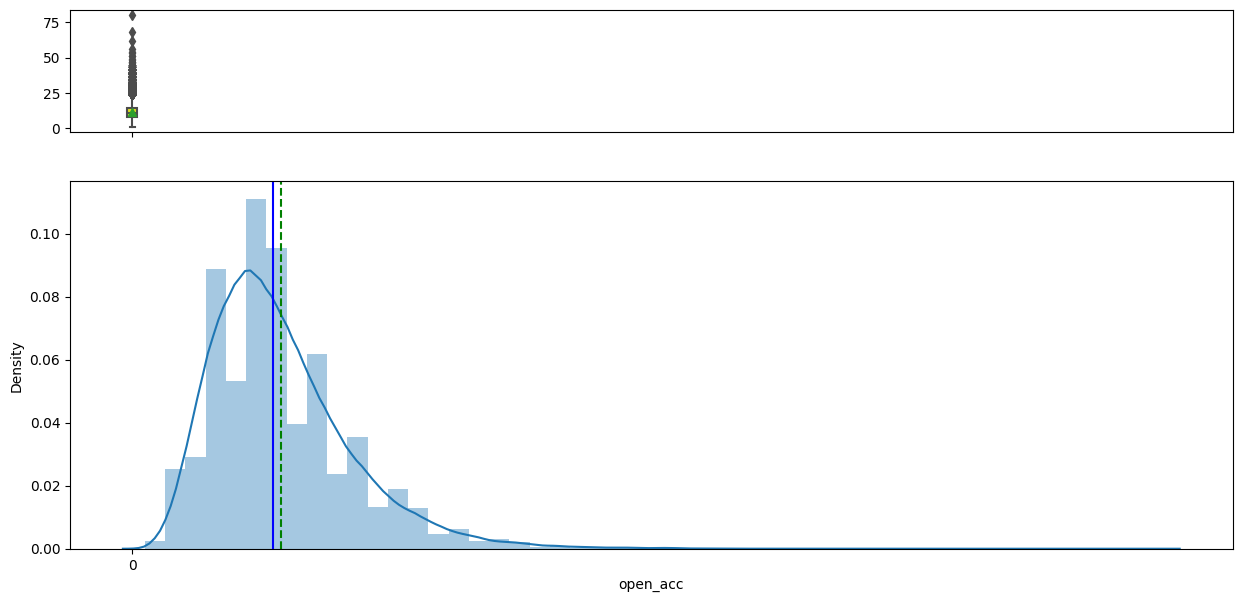

In [17]:
histogram_boxplot(data.open_acc)

pub_rec

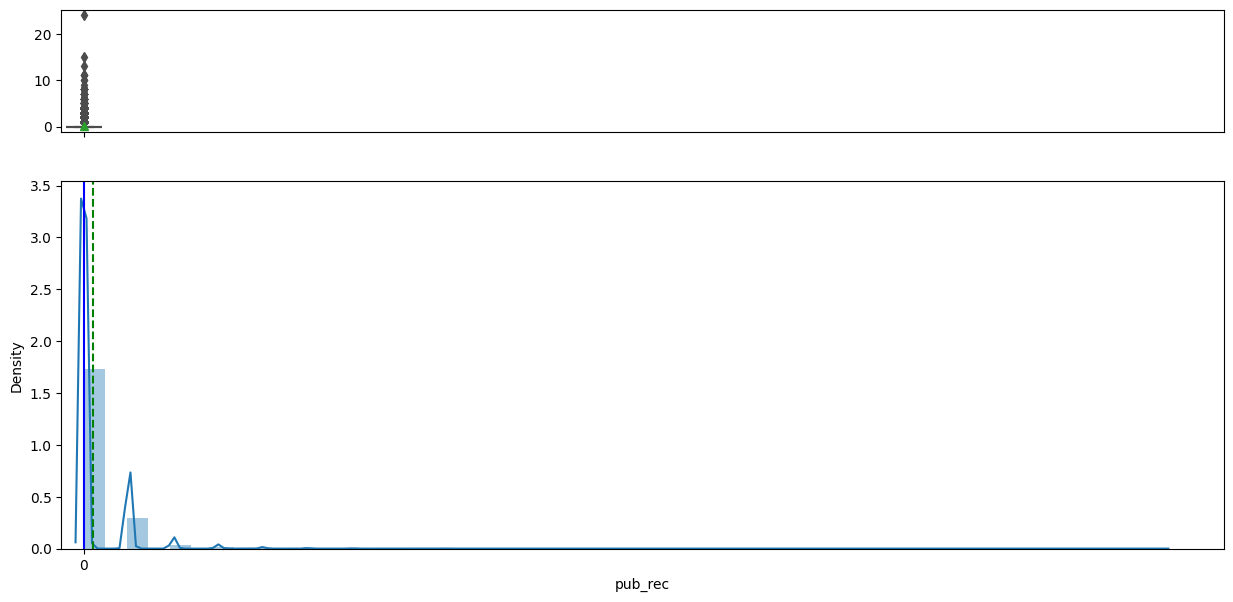

In [18]:
histogram_boxplot(data.pub_rec)

revol_bal

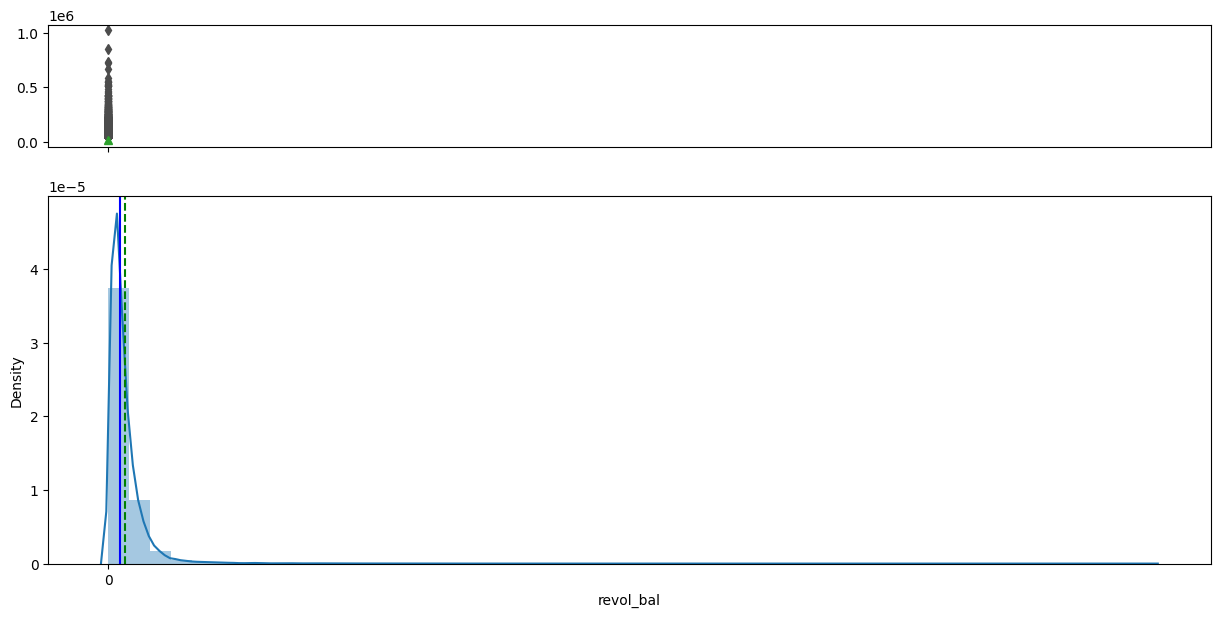

In [19]:
histogram_boxplot(data.revol_bal)

total_acc

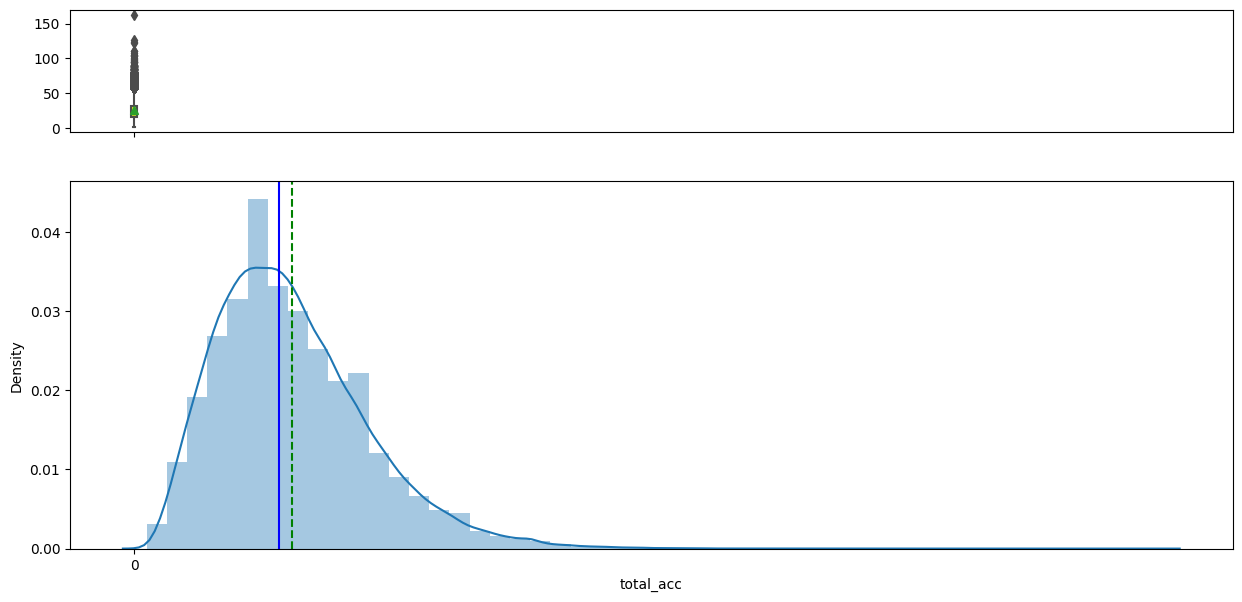

In [20]:
histogram_boxplot(data.total_acc)

In [21]:
data.select_dtypes(include='float').columns

Index(['annual_inc', 'int_rate', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal',
       'pub_rec_bankruptcies', 'revol_util'],
      dtype='object')

annual_inc 

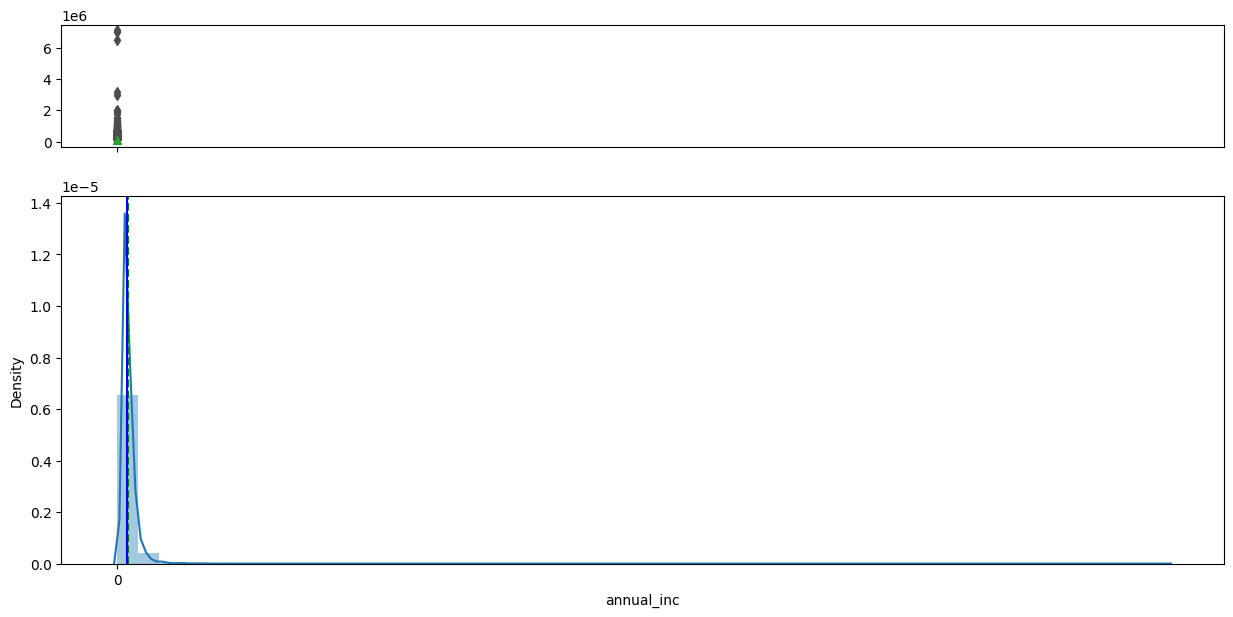

In [22]:
histogram_boxplot(data.annual_inc)

int_rate 

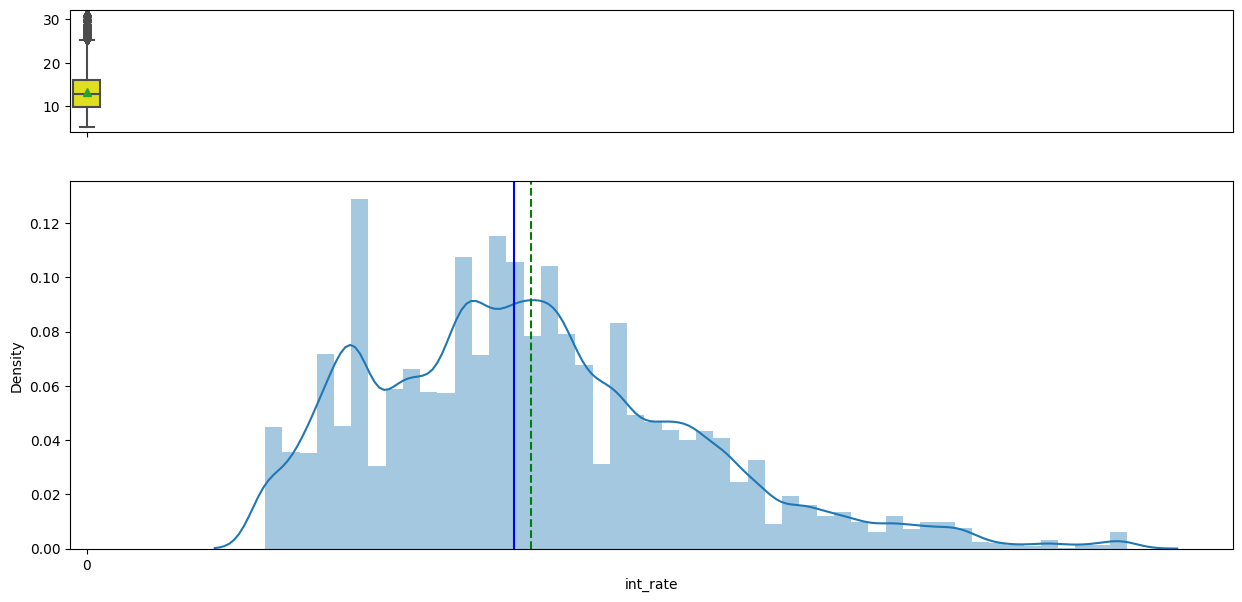

In [23]:
histogram_boxplot(data.int_rate)

num_actv_bc_tl

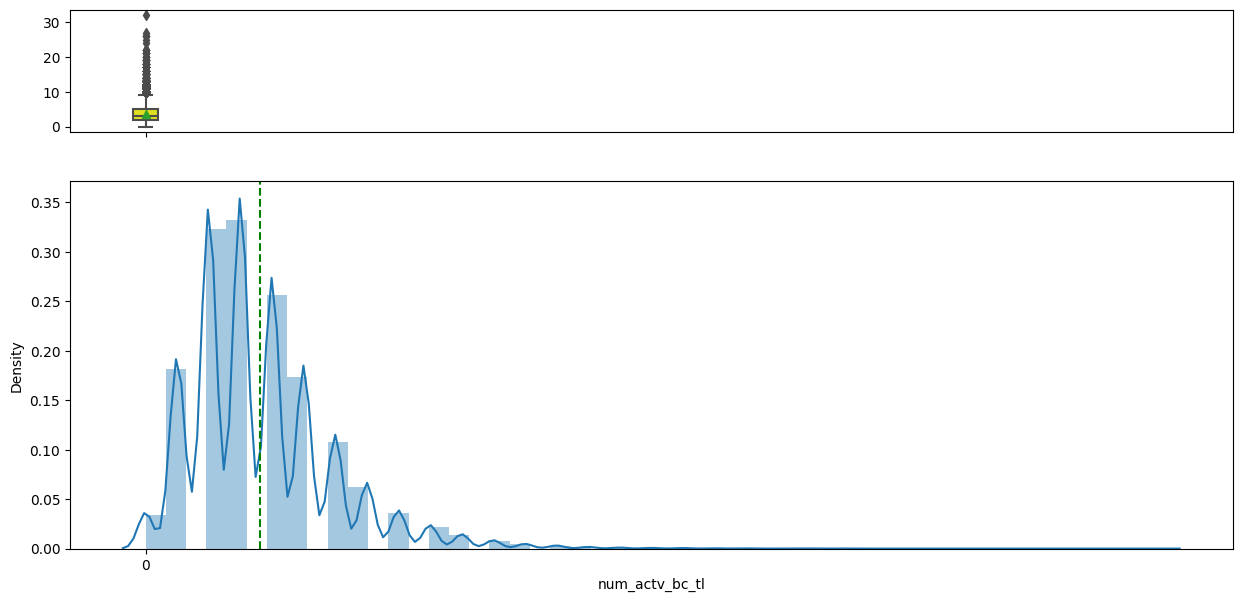

In [24]:
histogram_boxplot(data.num_actv_bc_tl)

mort_acc

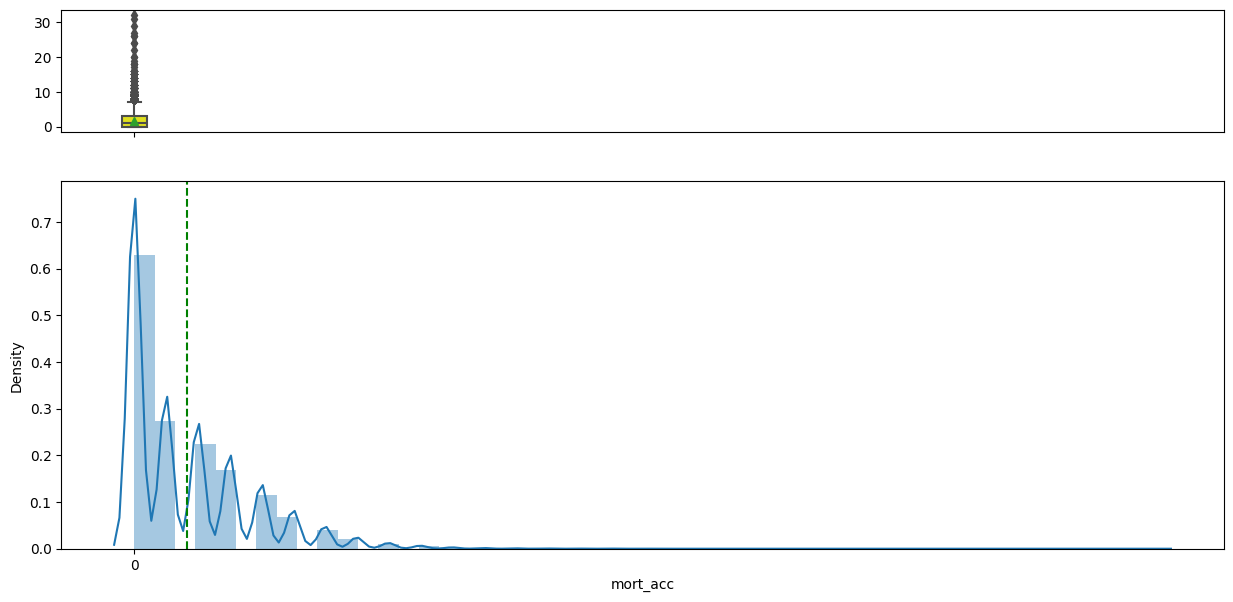

In [25]:
histogram_boxplot(data.mort_acc)

tot_cur_bal 

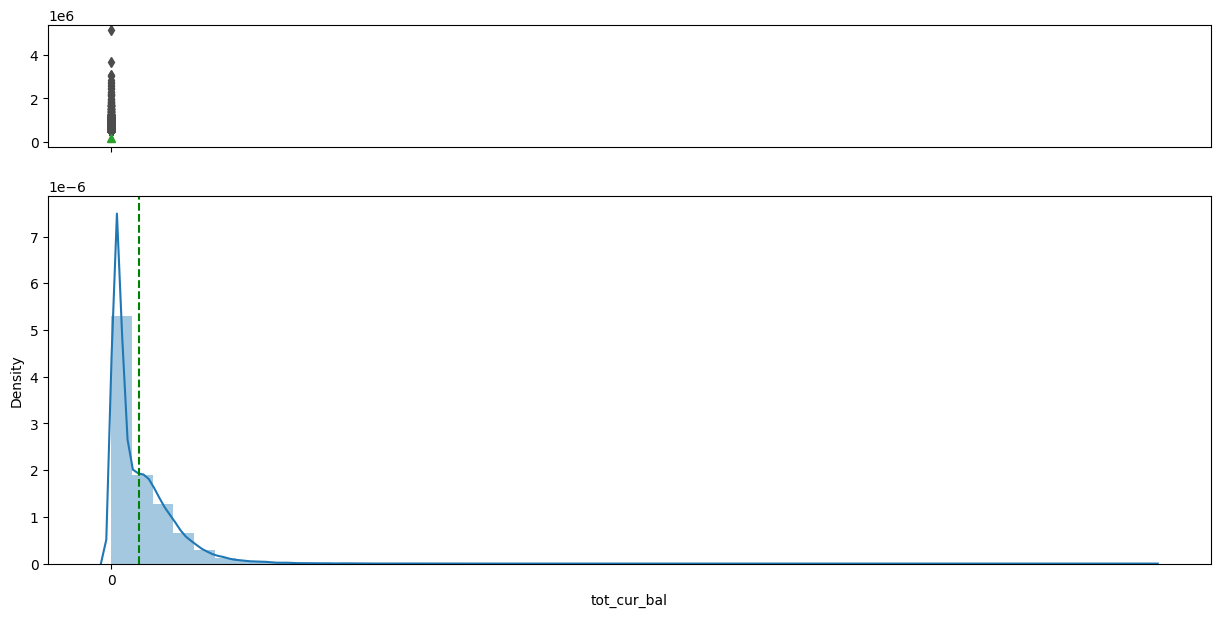

In [26]:
histogram_boxplot(data.tot_cur_bal)

pub_rec_bankruptcies

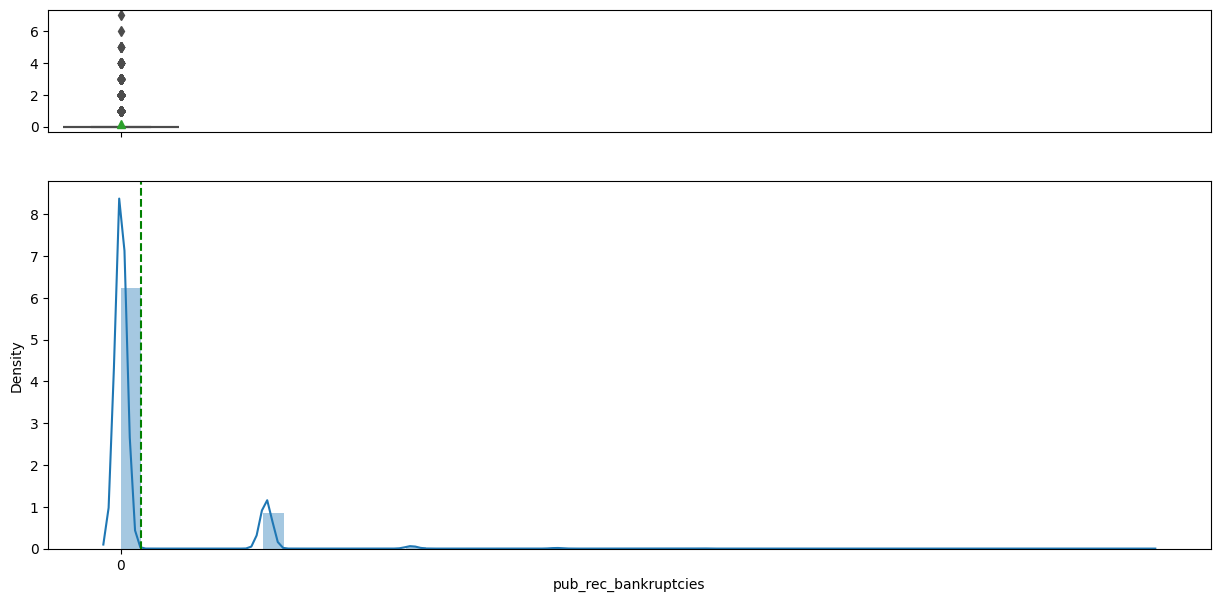

In [27]:
histogram_boxplot(data.pub_rec_bankruptcies)

revol_util 

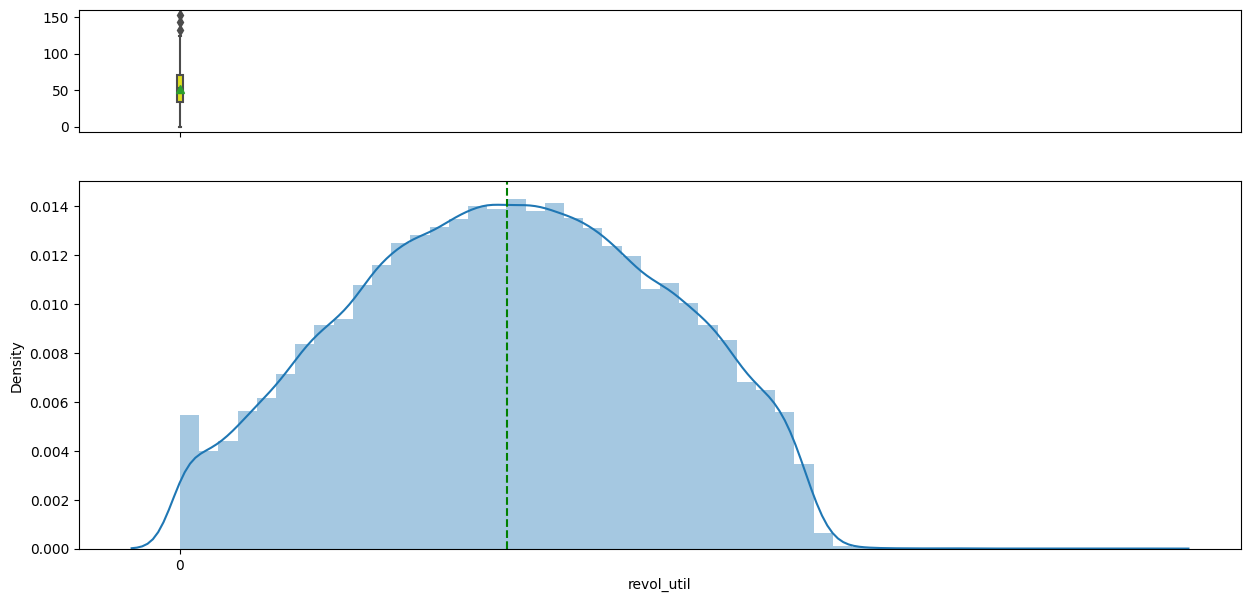

In [28]:
histogram_boxplot(data.revol_util)

public records

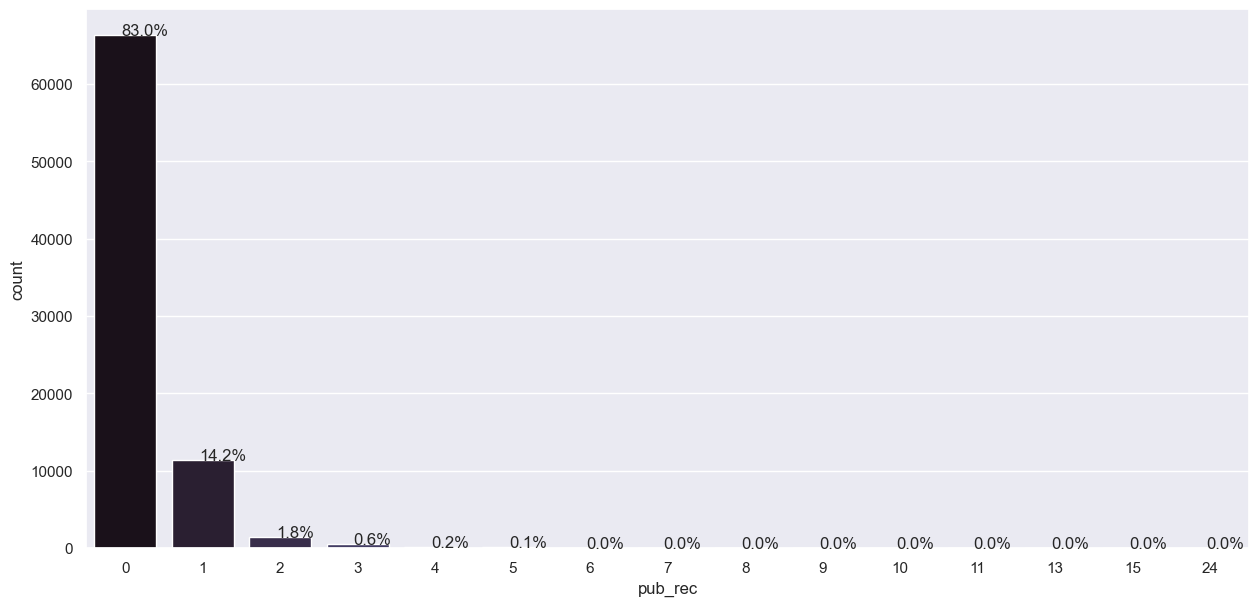

In [29]:
perc_on_bar(data.pub_rec)

home_ownership

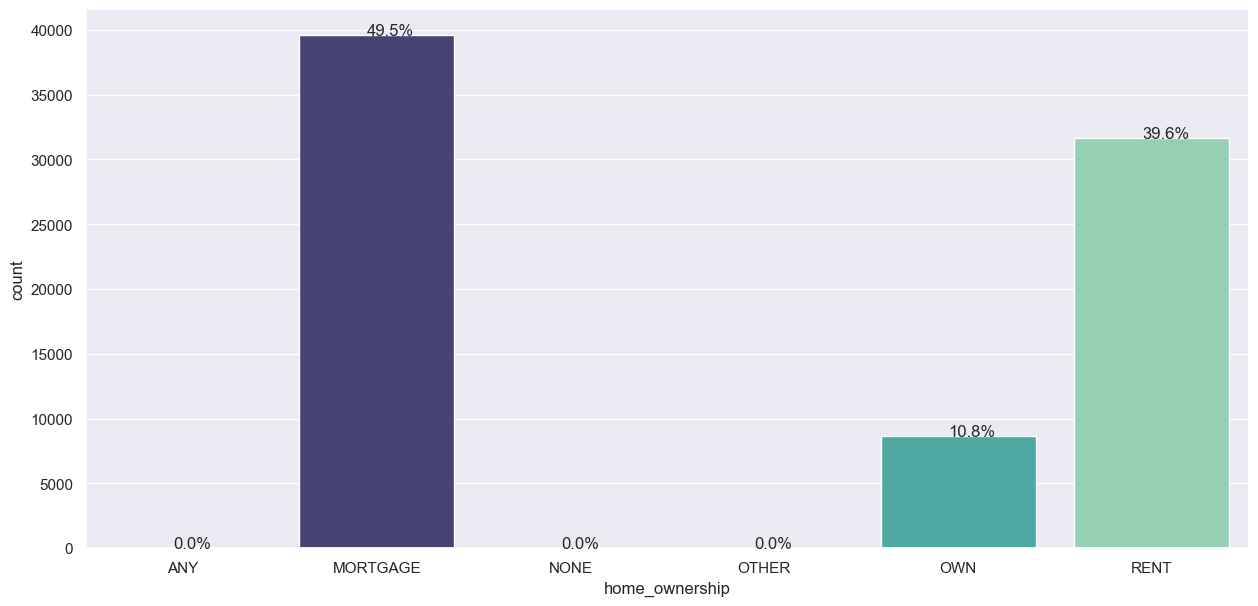

In [30]:
perc_on_bar(data.home_ownership)

loan_term 

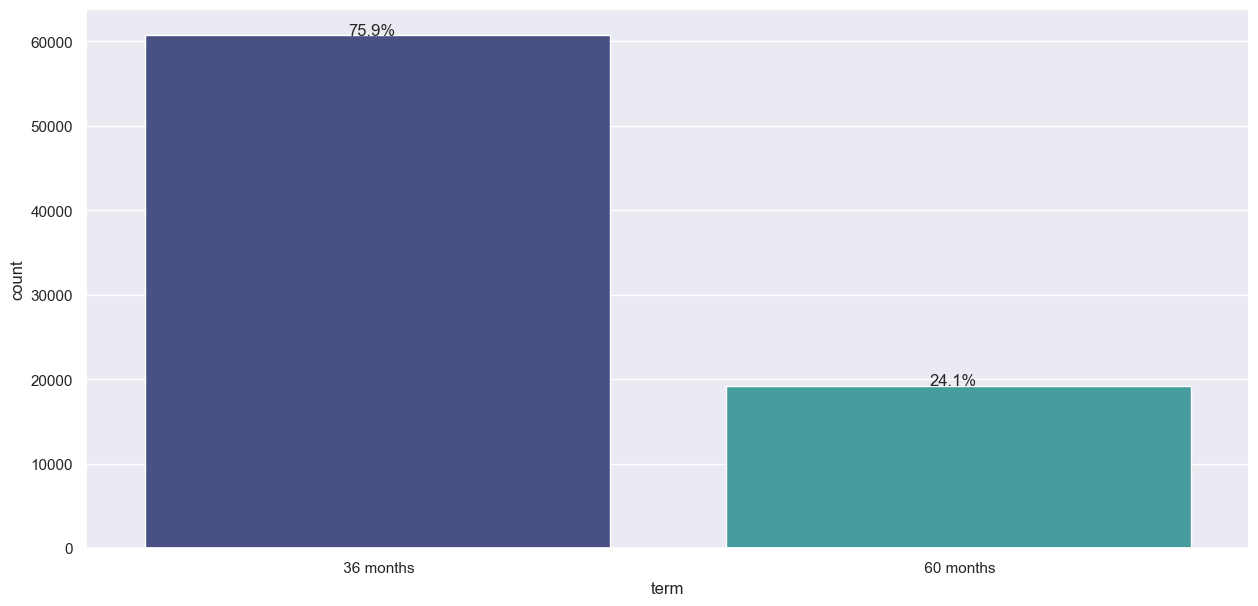

In [31]:
perc_on_bar(data.term)

loan_grade 

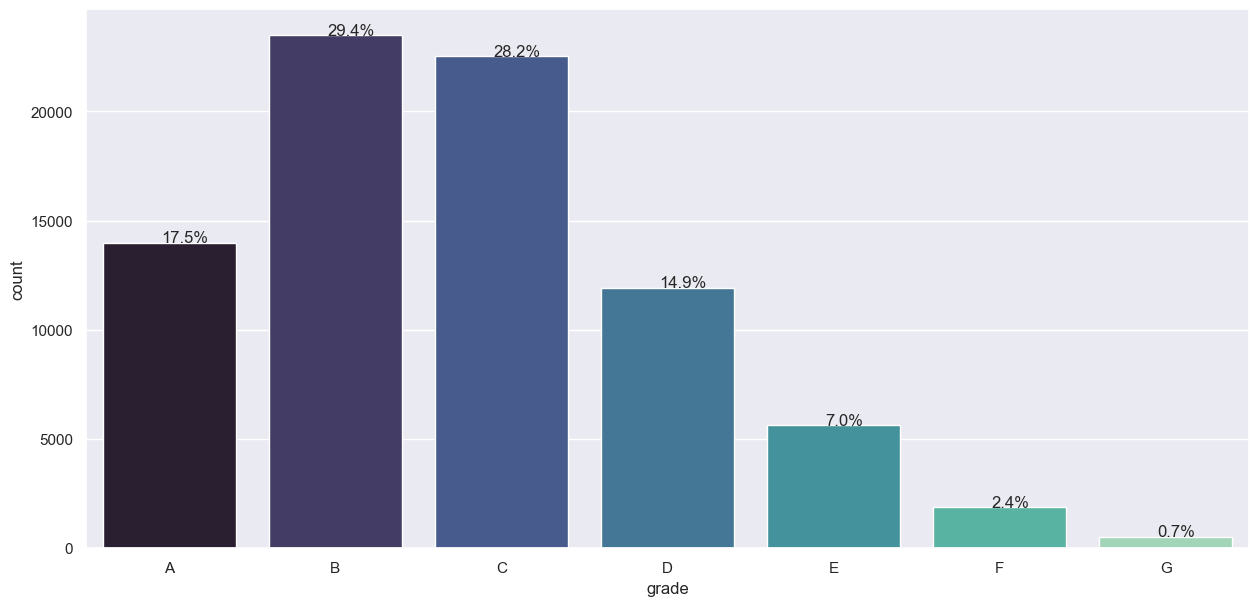

In [32]:
perc_on_bar(data.grade)

loan_subgrade

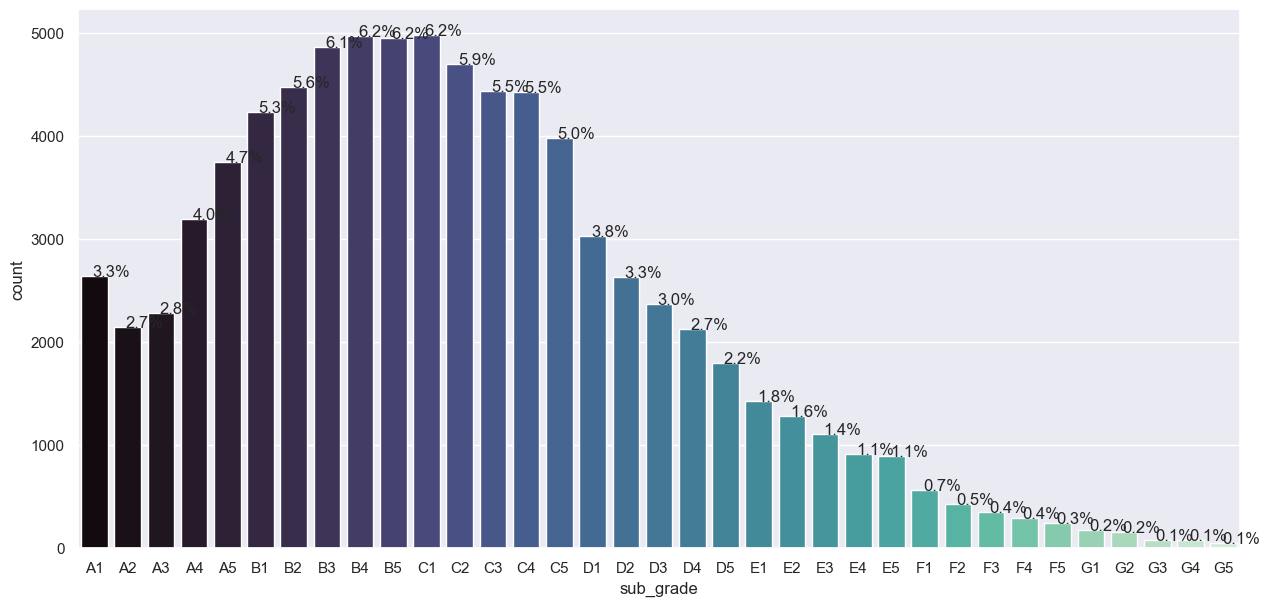

In [33]:
perc_on_bar(data.sub_grade)

income_verification_status

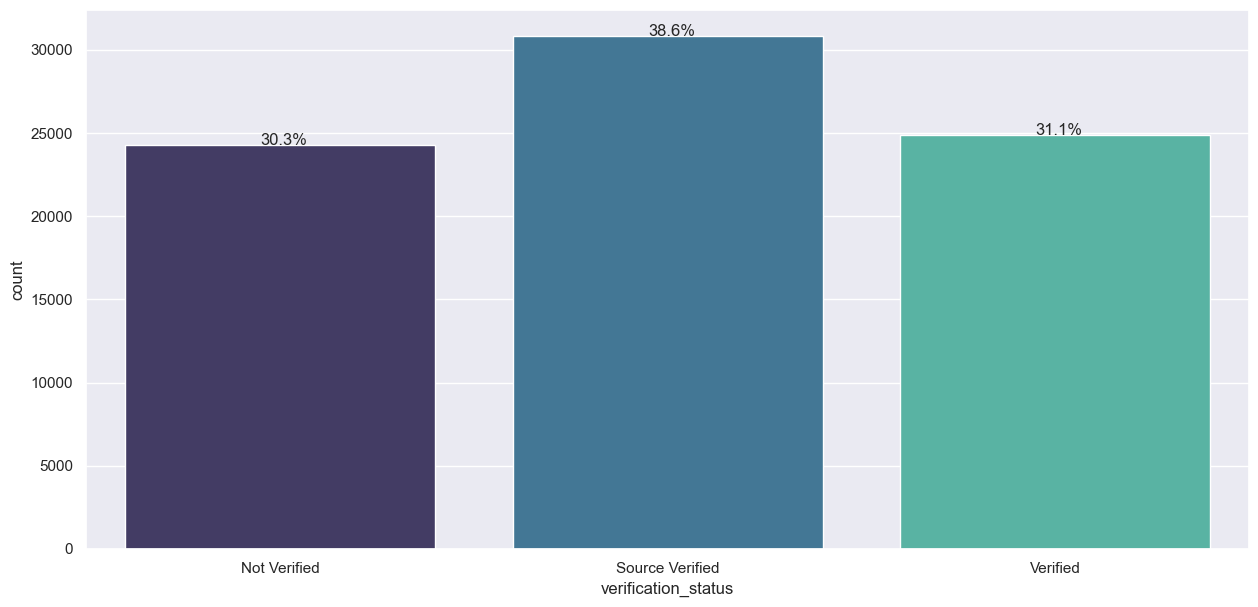

In [34]:
perc_on_bar(data.verification_status)

loan_purpose 

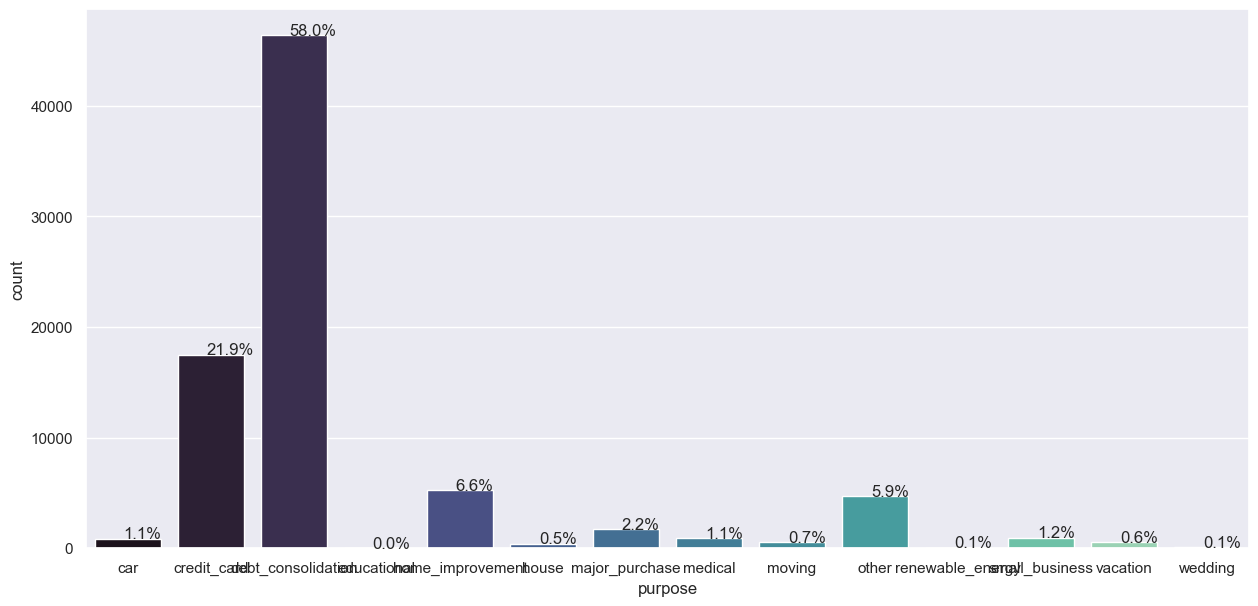

In [35]:
perc_on_bar(data.purpose)

application_type

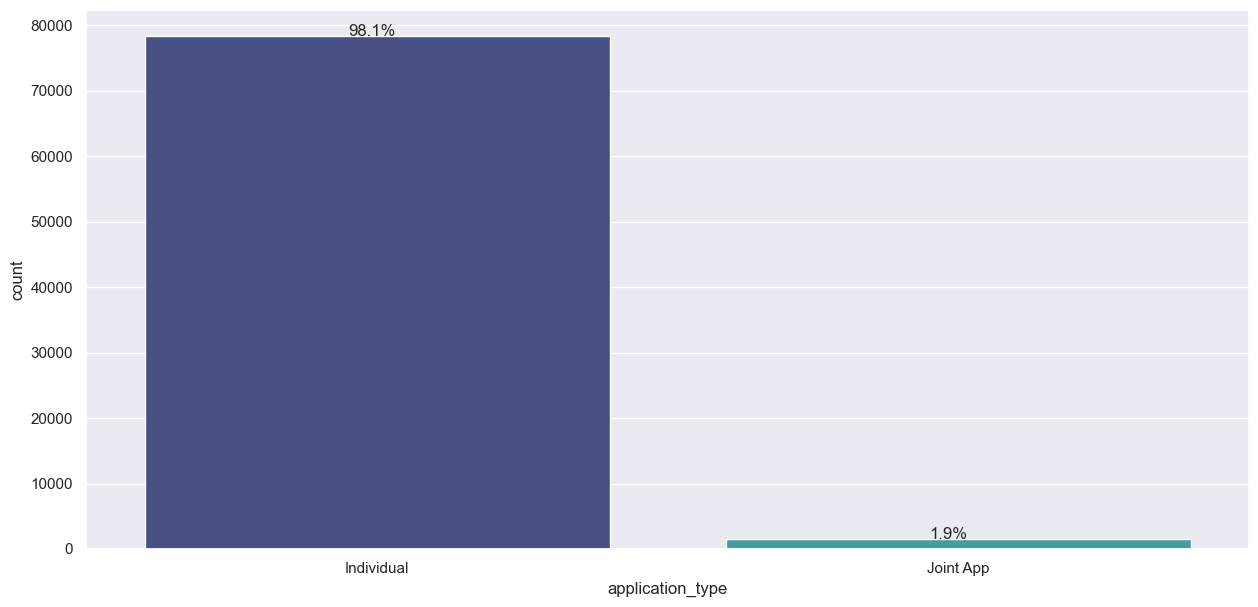

In [36]:
perc_on_bar(data.application_type)

Bivariate Analysis 

In [37]:
## Function to plot stacked bar chart
def stacked_plot(x, y, show_df=True):
    """
    Shows stacked plot from x and y pandas data series
    x: pandas data series
    y: pandas data series
    show_df: flag to show dataframe above plot (default=True)
    """
    if show_df == True:
        info = pd.crosstab(x, y, margins=True)
        info['% - 0'] = round(info[0]/info['All']*100, 2)
        info['% - 1'] = round(info[1]/info['All']*100, 2)
        display(info)
        
    pd.crosstab(x, y, normalize='index').plot(kind='bar', stacked=True, figsize=(10,5));

In [38]:
def show_boxplots(cols: list, feature: str, show_fliers=True, data=data): #method call to show bloxplots
    """
    Shows boxplots from pandas data series
    cols: list of column names
    feature: dataframe categorical feature
    """
    n_rows = math.ceil(len(cols)/3)
    plt.figure(figsize=(15, n_rows*5))
    for i, variable in enumerate(cols):
        plt.subplot(n_rows, 3, i+1)
        if show_fliers:
            sns.boxplot(data[feature], data[variable], palette="mako", showfliers=True) 
        else:
            sns.boxplot(data[feature], data[variable], palette="mako", showfliers=False)
        plt.tight_layout()
        plt.title(variable, fontsize=12)
    plt.show()

In [39]:
### Function to plot distributions and Boxplots of customers
def plot_target(x, target='default'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title('Distribution of DEFAULT')
    sns.distplot(data[(data[target] == 1)][x], ax=axs[0,0], color='teal')
    axs[0, 1].set_title('Distribution of NON-DEFAULT')
    sns.distplot(data[(data[target] == 0)][x],ax=axs[0,1], color='orange')
    axs[1,0].set_title('Boxplot w.r.t default-flag')
    sns.boxplot(data[target],data[x],ax=axs[1,0], palette='mako')
    axs[1,1].set_title('Boxplot w.r.t default-flag - Without outliers')
    sns.boxplot(data[target],data[x], ax=axs[1,1], showfliers=False, palette='mako')
    plt.tight_layout()
    plt.show()

Heat map

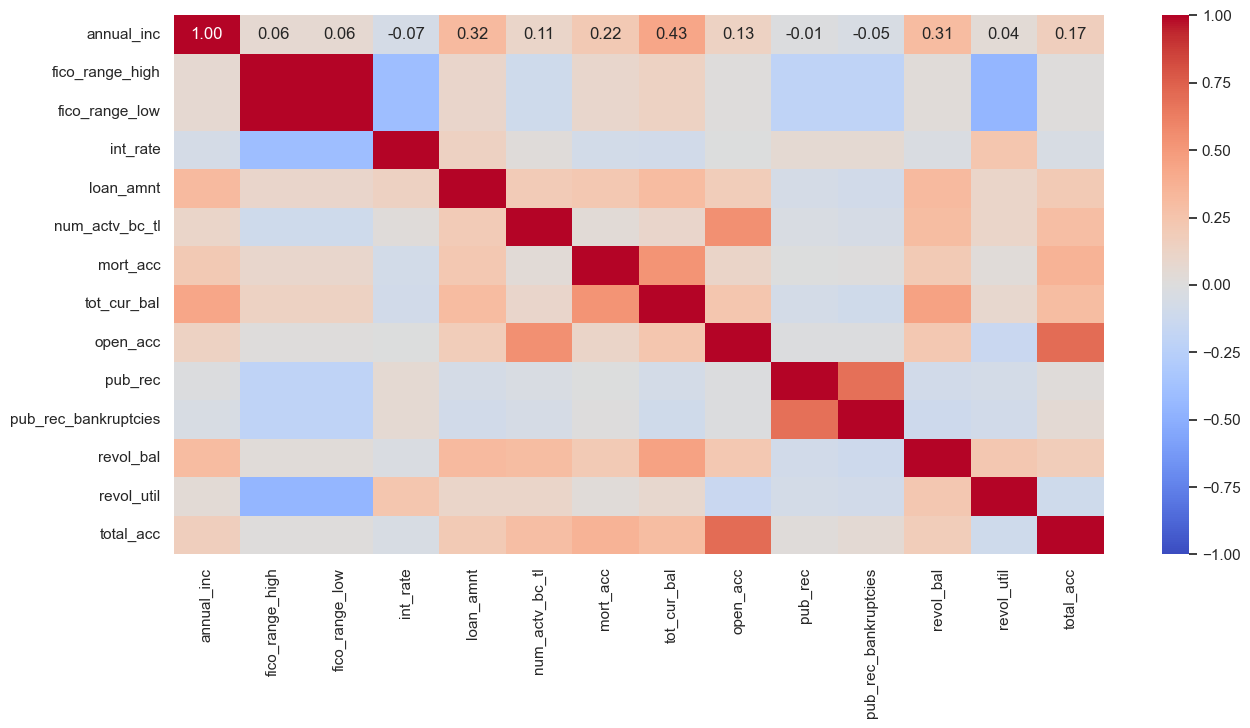

In [40]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='coolwarm');

In [41]:
data.groupby(by='loan_status')['loan_amnt'].describe()

count          mean          std     min     25%      50%  \
loan_status                                                                
Defaulted    15970.0  15531.781465  8799.439167  1000.0  9000.0  14387.5   
Paid         64030.0  14122.549977  8657.016959   750.0  7500.0  12000.0   

                 75%      max  
loan_status                    
Defaulted    20125.0  40000.0  
Paid         20000.0  40000.0

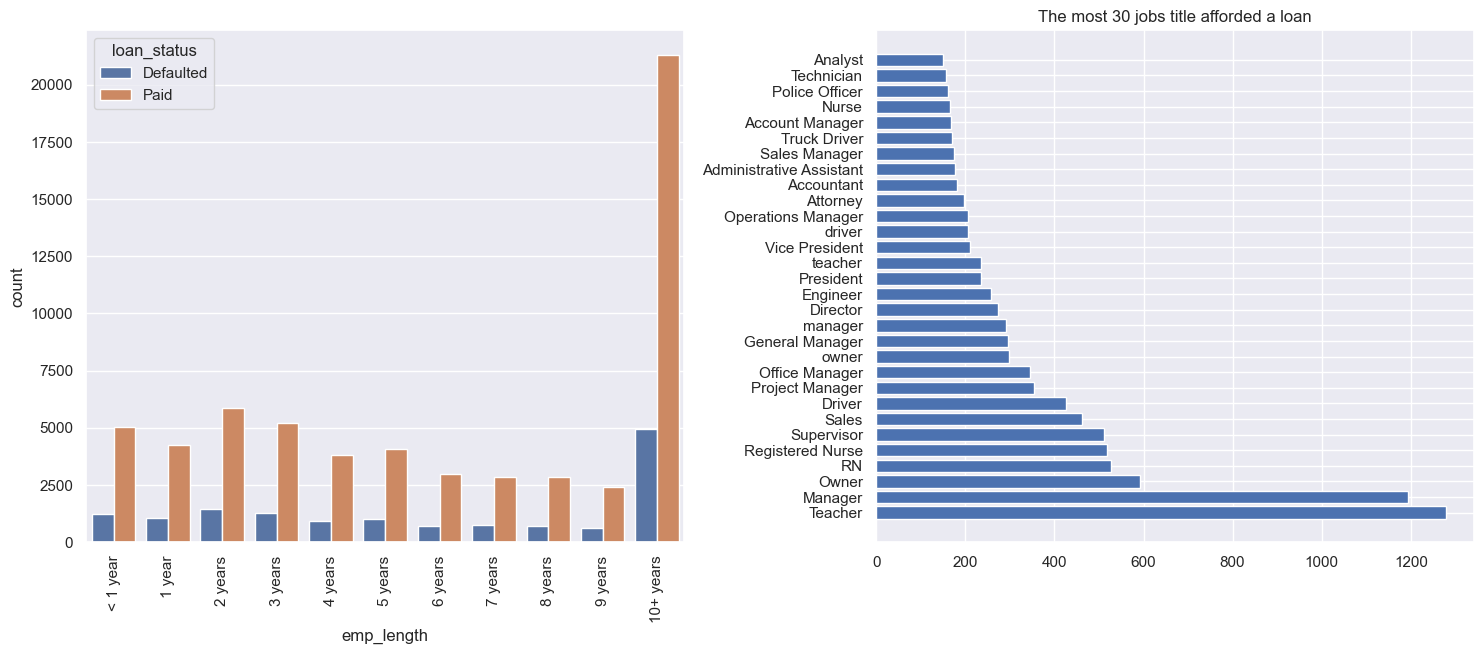

In [44]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=data, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(data.emp_title.value_counts()[:30].index, data.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

title 

In [46]:
data['title'] = data.title.str.lower()
data.title.value_counts()[:10]

debt consolidation         40630
credit card refinancing    14837
home improvement            4696
other                       4044
major purchase              1441
medical expenses             797
business                     751
car financing                663
vacation                     470
moving and relocation        467
Name: title, dtype: int64

title: will be removed because we have the purpose a column that is generated from it. 

<Axes: xlabel='pub_rec_bankruptcies', ylabel='count'>

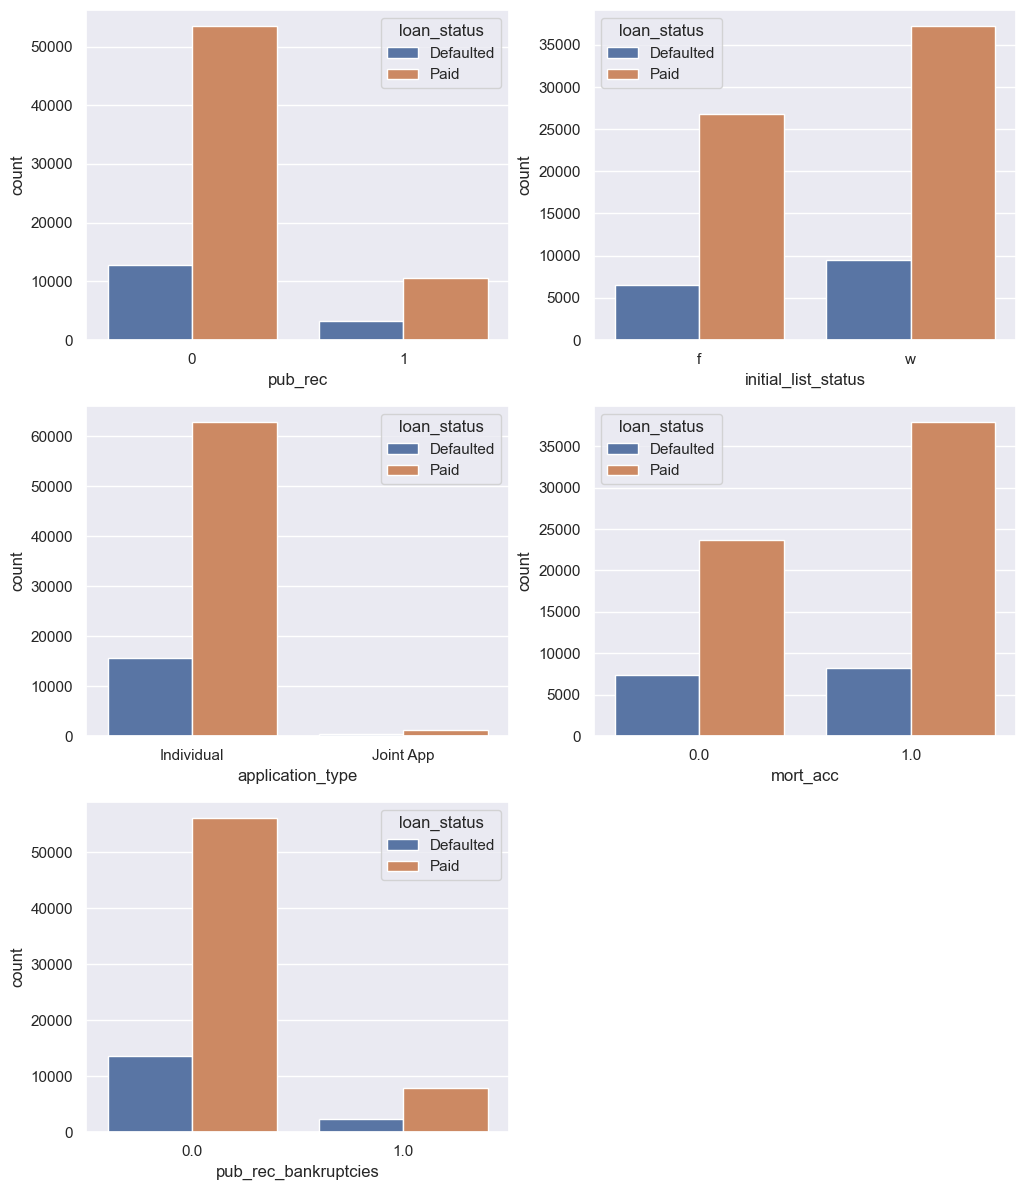

In [53]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
data['pub_rec'] = data.pub_rec.apply(pub_rec)
data['mort_acc'] = data.mort_acc.apply(mort_acc)
data['pub_rec_bankruptcies'] = data.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=data, hue='loan_status')

plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=data, hue='loan_status')

plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=data, hue='loan_status')

plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=data, hue='loan_status')

plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=data, hue='loan_status')

In [56]:
data.corr()['mort_acc'].drop('mort_acc').sort_values().hvplot.barh()

:Bars   [index]   (mort_acc)

In [62]:
data.earliest_cr_line.value_counts()

Sep-03    547
Aug-03    545
Aug-01    544
Oct-01    541
Sep-02    539
         ... 
Jul-65      1
Sep-59      1
Sep-65      1
Jul-64      1
Nov-66      1
Name: earliest_cr_line, Length: 640, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split

In [75]:
X= data.drop(['loan_status'],axis=1)
y=data['loan_status']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

# Oversampling train data 

In [78]:
from imblearn.over_sampling import SMOTE

print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))

print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 0
Before UpSampling, counts of label 'No': 0 



ValueError: Input y contains NaN.

In [92]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.model_selection.GridSearchCV

SyntaxError: invalid syntax (2001464154.py, line 6)

In [93]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss', n_estimators=50))

#Parameter grid to pass in RandomizedSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
            'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, 
                                   scoring=scorer, cv=5, random_state=1, n_jobs=-1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print(f"Best Parameters:{randomized_cv.best_params_} \nScore: {randomized_cv.best_score_}")

ValueError: Input y contains NaN.

In [94]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    'decisiontreeclassifier__max_depth': np.arange(2, 30), 
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 7, 10],
    'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10, 15],
    'decisiontreeclassifier__min_impurity_decrease': [0.0001,0.001,0.01,0.1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(f"Best parameters are {grid_cv.best_params_} \nScore={grid_cv.best_score_}:")

NameError: name 'GridSearchCV' is not defined

# Test Set Prediction

In [96]:
test = pd.read_csv(r"C:\Users\Parthiban\Downloads\test_loan_data (1).csv")
test

addr_state  annual_inc earliest_cr_line emp_length  \
0             MO     50000.0         May-2012     1 year   
1             HI     92000.0         Dec-2001  10+ years   
2             TX     89000.0         Mar-1989  10+ years   
3             CA     33000.0         Nov-2004    9 years   
4             MI     35580.0         Feb-1997        NaN   
...          ...         ...              ...        ...   
19995         MO     38500.0         Sep-2010    4 years   
19996         VA     80000.0         Dec-1998    3 years   
19997         TX     95000.0         May-1996  10+ years   
19998         FL     35000.0         Mar-2003  10+ years   
19999         FL     30700.0         Apr-1994   < 1 year   

                               emp_title  fico_range_high  fico_range_low  \
0                       Tower technician            719.0           715.0   
1                             Supervisor            684.0           680.0   
2                APPLICATIONS PROGRAMMER            679.0           675.0   
3      San Diego Unified School District            674.0           670.0   
4                                    NaN            704.0           700.0   
...                                  ...              ...             ...   
19995               lighting coordinator            679.0           675.0   
19996      Contract & Compliance Manager            674.0           670.0   
19997                         Pharmacist            729.0           725.0   
19998                Manager In Training            809.0           805.0   
19999                      rv technician            664.0           660.0   

      grade home_ownership application_type  ... pub_rec  \
0         C            OWN       Individual  ...     0.0   
1         B           RENT       Individual  ...     0.0   
2         B       MORTGAGE       Individual  ...     0.0   
3         C           RENT       Individual  ...     1.0   
4         B       MORTGAGE       Individual  ...     0.0   
...     ...            ...              ...  ...     ...   
19995     D           RENT       Individual  ...     0.0   
19996     D       MORTGAGE       Individual  ...     0.0   
19997     B       MORTGAGE       Individual  ...     0.0   
19998     A       MORTGAGE       Individual  ...     0.0   
19999     E       MORTGAGE       Individual  ...     0.0   

       pub_rec_bankruptcies             purpose  revol_bal  revol_util  \
0                       0.0  debt_consolidation     2568.0         9.8   
1                       0.0  debt_consolidation    30394.0        75.4   
2                       0.0         credit_card    38400.0        75.3   
3                       1.0  debt_consolidation    21224.0        69.4   
4                       0.0  debt_consolidation     3471.0        39.4   
...                     ...                 ...        ...         ...   
19995                   0.0  debt_consolidation     5816.0        60.0   
19996                   0.0  debt_consolidation    13886.0        75.1   
19997                   0.0  debt_consolidation    43166.0        60.7   
19998                   0.0                 car     1110.0         4.4   
19999                   0.0  debt_consolidation     8910.0        78.8   

       sub_grade        term                    title  total_acc  \
0             C4   36 months       Debt consolidation       11.0   
1             B2   36 months       Debt consolidation       35.0   
2             B2   60 months  Credit card refinancing       41.0   
3             C1   36 months           Breathing Room       16.0   
4             B5   36 months       debitconsolidation       19.0   
...          ...         ...                      ...        ...   
19995         D4   36 months       Debt consolidation       10.0   
19996         D4   60 months       Debt consolidation       30.0   
19997         B5   36 months       Debt consolidation       29.0   
19998         A5   36 months            Car financing       19.0   
19

In [102]:
test.annual_inc.fillna(test.annual_inc.mean(), inplace=True)

test.tot_cur_bal.fillna(test.tot_cur_bal.mean(), inplace=True)
test.revol_util.fillna(test.revol_util.mean(), inplace=True)
test.total_acc.fillna(test.total_acc.mean(), inplace=True)

In [103]:
print(test.columns)
test.shape

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status'],
      dtype='object')


(20000, 27)

In [108]:
term = {'3 years': 0, '5 years': 1}
test['term'] = test['term'].map(term).astype('Int32')

grade = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6}
test['grade'] = test['grade'].map(grade).astype('Int32')

sub_grade = {'A1':0,  'A2':1,  'A3':2,  'A4':3,  'A5':4, 
                 'B1':5,  'B2':6,  'B3':7,  'B4':8,  'B5':9, 
                 'C1':10, 'C2':11, 'C3':12, 'C4':13, 'C5':14,
                 'D1':15, 'D2':16, 'D3':17, 'D4':18, 'D5':19,
                 'E1':20, 'E2':21, 'E3':22, 'E4':23, 'E5':24,
                 'F1':25, 'F2':26, 'F3':27, 'F4':28, 'F5':29,
                 'G1':30, 'G2':31, 'G3':32, 'G4':33, 'G5':34}
test['sub_grade'] = test['sub_grade'].map(sub_grade).astype('Int32')

home_ownership = {'MORTGAGE':0, 'RENT':1, 'OWN':2, 'OTHER':3, 'NONE':4}
test['home_ownership'] = test['home_ownership'].map(home_ownership).astype('Int32')

verification_status = {'Verified':0, 'Not Verified':1, 'Source Verified':2}
test['verification_status'] = test['verification_status'].map(verification_status).astype('Int32')

purpose = {'debt_consolidation': 0, 'credit_card':1, 'home_improvement': 2, 'other': 3}
test['purpose'] = test['purpose'].map(purpose).astype('Int32')

application_type = {'INDIVIDUAL': 0, 'JOINT':1}
test['application_type'] = test['application_type'].map(application_type).astype('Int32')



In [110]:
test.describe()

annual_inc  fico_range_high  fico_range_low  grade  home_ownership  \
count  2.000000e+04     20000.000000    20000.000000    0.0             0.0   
mean   7.649765e+04       700.204400      696.204250   <NA>            <NA>   
std    8.568097e+04        31.768558       31.767853   <NA>            <NA>   
min    0.000000e+00       664.000000      660.000000   <NA>            <NA>   
25%    4.500000e+04       674.000000      670.000000   <NA>            <NA>   
50%    6.500000e+04       694.000000      690.000000   <NA>            <NA>   
75%    9.000000e+04       714.000000      710.000000   <NA>            <NA>   
max    9.522972e+06       850.000000      845.000000   <NA>            <NA>   

       application_type      int_rate    loan_amnt  num_actv_bc_tl  \
count               0.0  20000.000000  20000.00000    18989.000000   
mean               <NA>     13.259451  14426.67125        3.617410   
std                <NA>      4.772028   8811.38736        2.220795   
min                <NA>      5.310000   1000.00000        0.000000   
25%                <NA>      9.750000   7800.00000        2.000000   
50%                <NA>     12.790000  12000.00000        3.000000   
75%                <NA>     16.020000  20000.00000        5.000000   
max                <NA>     30.990000  40000.00000       20.000000   

           mort_acc  ...      open_acc       pub_rec  pub_rec_bankruptcies  \
count  19296.000000  ...  20000.000000  20000.000000          19989.000000   
mean       1.669310  ...     11.593450      0.208000              0.130722   
std        1.981554  ...      5.507847      0.568816              0.374106   
min        0.000000  ...      1.000000      0.000000              0.000000   
25%        0.000000  ...      8.000000      0.000000              0.000000   
50%        1.000000  ...     11.000000      0.000000              0.000000   
75%        3.000000  ...     14.000000      0.000000              0.000000   
max       19.000000  ...     56.000000     15.000000              8.000000   

       purpose     revol_bal    revol_util  sub_grade  term     total_acc  \
count      0.0   20000.00000  20000.000000        0.0   0.0  20000.000000   
mean      <NA>   16181.77750     51.709746       <NA>  <NA>     25.022300   
std       <NA>   21917.28208     24.501750       <NA>  <NA>     12.098794   
min       <NA>       0.00000      0.000000       <NA>  <NA>      2.000000   
25%       <NA>    5803.75000     33.200000       <NA>  <NA>     16.000000   
50%       <NA>   11051.50000     52.200000       <NA>  <NA>     23.000000   
75%       <NA>   19876.25000     70.600000       <NA>  <NA>     32.000000   
max       <NA>  921464.00000    127.600000       <NA>  <NA>    107.000000   

       verification_status  
count                  0.0  
mean                  <NA>  
std                   <NA>  
min                   <NA>  
25%                   <NA>  
50%                   <NA>  
75%                   <NA>  
max                   <NA>  

[8 rows x 21 columns]

In [111]:

print(test.isna().sum())

addr_state                  0
annual_inc                  0
earliest_cr_line            0
emp_length               1258
emp_title                1378
fico_range_high             0
fico_range_low              0
grade                   20000
home_ownership          20000
application_type        20000
initial_list_status         0
int_rate                    0
loan_amnt                   0
num_actv_bc_tl           1011
mort_acc                  704
tot_cur_bal                 0
open_acc                    0
pub_rec                     0
pub_rec_bankruptcies       11
purpose                 20000
revol_bal                   0
revol_util                  0
sub_grade               20000
term                    20000
title                     247
total_acc                   0
verification_status     20000
dtype: int64


In [112]:
## Function to inverse the encoding
def test_inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    test[y] = np.round(test[y]).map(inv_dict).astype('category')

In [113]:

test_inverse_mapping(term,'term')
test_inverse_mapping(grade,'grade')
#inverse_mapping(sub_grade,'sub_grade')
test_inverse_mapping(home_ownership,'home_ownership')
test_inverse_mapping(verification_status,'verification_status')
test_inverse_mapping(purpose,'purpose')
test_inverse_mapping(application_type,'application_type')


In [114]:
test.head()

addr_state  annual_inc earliest_cr_line emp_length  \
0         MO     50000.0         May-2012     1 year   
1         HI     92000.0         Dec-2001  10+ years   
2         TX     89000.0         Mar-1989  10+ years   
3         CA     33000.0         Nov-2004    9 years   
4         MI     35580.0         Feb-1997        NaN   

                           emp_title  fico_range_high  fico_range_low grade  \
0                   Tower technician            719.0           715.0   NaN   
1                         Supervisor            684.0           680.0   NaN   
2            APPLICATIONS PROGRAMMER            679.0           675.0   NaN   
3  San Diego Unified School District            674.0           670.0   NaN   
4                                NaN            704.0           700.0   NaN   

  home_ownership application_type  ... pub_rec  pub_rec_bankruptcies  purpose  \
0            NaN              NaN  ...     0.0                   0.0      NaN   
1            NaN              NaN  ...     0.0                   0.0      NaN   
2            NaN              NaN  ...     0.0                   0.0      NaN   
3            NaN              NaN  ...     1.0                   1.0      NaN   
4            NaN              NaN  ...     0.0                   0.0      NaN   

   revol_bal  revol_util  sub_grade  term                    title  total_acc  \
0     2568.0         9.8       <NA>   NaN       Debt consolidation       11.0   
1    30394.0        75.4       <NA>   NaN       Debt consolidation       35.0   
2    38400.0        75.3       <NA>   NaN  Credit card refinancing       41.0   
3    21224.0        69.4       <NA>   NaN           Breathing Room       16.0   
4     3471.0        39.4       <NA>   NaN       debitconsolidation       19.0   

  verification_status  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 27 columns]

In [115]:
cols = test.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(test[i].value_counts(dropna=False))
    print('*'*30)

CA    2865
TX    1718
NY    1632
FL    1366
IL     794
NJ     722
OH     691
PA     683
GA     652
NC     596
VA     580
AZ     506
MI     504
MD     463
WA     450
MA     424
CO     417
MN     352
MO     307
IN     304
CT     290
TN     287
NV     284
SC     262
LA     261
OR     254
WI     254
AL     244
KY     203
OK     196
KS     184
AR     149
UT     142
HI      98
NM      94
RI      84
MS      83
NH      77
WV      73
NE      63
DE      62
MT      51
DC      51
AK      50
ME      37
SD      36
VT      31
WY      30
ND      25
ID      19
Name: addr_state, dtype: int64
******************************
Oct-2001    160
Sep-2004    143
Aug-2001    142
Aug-2000    136
Sep-2003    136
           ... 
Mar-1968      1
Nov-1972      1
Jun-1963      1
Jul-1973      1
Dec-1959      1
Name: earliest_cr_line, Length: 568, dtype: int64
******************************
10+ years    6579
2 years      1810
< 1 year     1583
3 years      1580
1 year       1336
NaN          1258
5 years      1228
4 yea

In [116]:
test = pd.get_dummies(test, drop_first=True)
test.shape

(20000, 13443)

In [117]:
test.columns

Index(['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec',
       ...
       'title_webcap1', 'title_wedding', 'title_wedding 2013',
       'title_wedding bells', 'title_wedding expense',
       'title_wedding loan & pay off a little debt', 'title_working capital',
       'title_xmas', 'title_zero interest', 'title_zxcvb'],
      dtype='object', length=13443)

In [119]:
from xgboost import XGBClassifier 

In [120]:
pred = xgb_tuned.predict(test)
print(f"Prediction has length: {len(pred)}")

NameError: name 'xgb_tuned' is not defined